In [75]:
#Question 1 - Scipy 
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
from numpy import sin
from numpy import sqrt
from numpy import arange
import pandas as pd

In [61]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [62]:
Lenarr = list(range(1 , len(Max)+1))
Lenarr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [66]:
#define either cubic function or sin function to get the curve fit equation
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Lenarr,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Lenarr,
                                      Min, [-40, 20, 0])

Text(0, 0.5, 'Temperature(*C)')

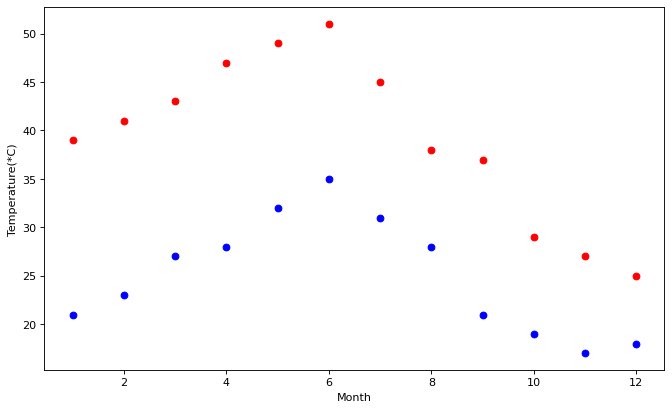

In [70]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(Lenarr,Max ,color = 'red' , )
plt.scatter(Lenarr,Min ,color = 'blue' , )
plt.xlabel("Month")
plt.ylabel("Temperature(*C)")

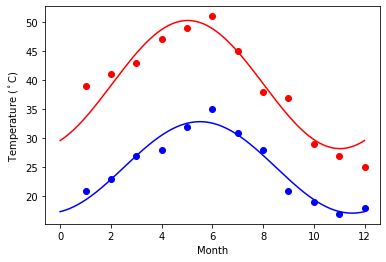

In [72]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Lenarr, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Lenarr, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [ ]:
#Question 2


In [77]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [78]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
#part 1 - create pie chart for male and female proportion
Piedf = titanic.groupby('sex').count()['survived']
Piedf

sex
female    466
male      843
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x2801e363850>,
 [Text(0.480836864838257, 0.9893411491555963, 'female'),
  Text(-0.4808369574670582, -0.9893411041363958, 'male')])

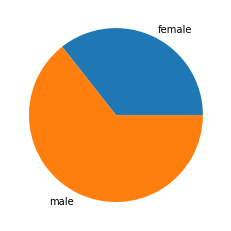

In [96]:
plt.pie(Piedf, labels = ['female' , 'male'])

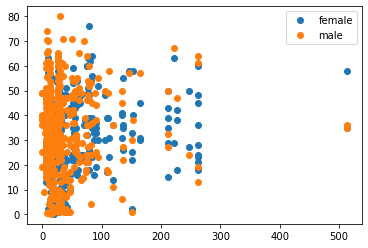

In [133]:
groups = titanic.groupby("sex")
for name, group in groups:
    plt.plot(group["fare"], group["age"], marker="o", linestyle="", label=name)
plt.legend()
